### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data collection and Preprocessing

In [ ]:
from google.colab import files
data = files.upload()

Saving User_Data.csv to User_Data.csv


In [ ]:
df = pd.read_csv("/content/User_Data.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Feature Selection and Engineering

In [ ]:
# encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Gender"]

,Gender
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [ ]:
x = df[["Gender", "Age", "EstimatedSalary"]]
y = df[["Purchased"]]

In [ ]:
x.shape, y.shape

((400, 3), (400, 1))

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Fit the classifier to the training data
rfc.fit(x_train, y_train)

# Make predictions
y_pred = rfc.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



### Confusion Matrix

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

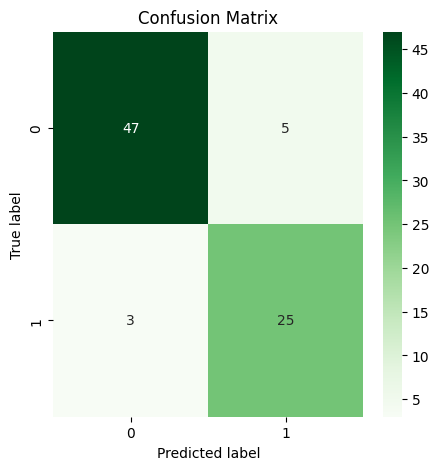

In [ ]:
# Create a Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Segmentation Analysis

In [ ]:
# Define salary bins and labels
bins = [0, 30000, 60000, 90000, 120000, float("inf")]
labels = ["Low", "Lower-Middle", "Middle", "Upper-Middle", "High"]

# Create a new column for salary segments
df["SalarySegment"] = pd.cut(df["EstimatedSalary"], bins=bins, labels=labels, right=False)

# Count the number of users in each segment
salary_segment_counts = df["SalarySegment"].value_counts().sort_index()
salary_segment_counts

,count
SalarySegment,
Low,53
Lower-Middle,114
Middle,145
Upper-Middle,46
High,42


In [ ]:
# Calculate purchase rate within each salary segment
purchase_analysis = df.groupby("SalarySegment")["Purchased"].mean() * 100

# Combine counts and purchase rate for a detailed analysis
salary_segment_analysis = pd.DataFrame({
    "User Count": salary_segment_counts,
    "Purchase Rate (%)": purchase_analysis})

salary_segment_analysis

<ipython-input-25-4d7719dbe7ae>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_analysis = df.groupby("SalarySegment")["Purchased"].mean() * 100


,User Count,Purchase Rate (%)
SalarySegment,,
Low,53,33.962264
Lower-Middle,114,23.684211
Middle,145,16.551724
Upper-Middle,46,76.086957
High,42,92.857143
